# College Admission

## DESCRIPTION

**Background and Objective:** 
Every year thousands of applications are being submitted by international students for admission in colleges of the USA. It becomes an iterative task for the Education Department to know the total number of applications received and then compare that data with the total number of applications successfully accepted and visas processed. Hence to make the entire process easy, the education department in the US analyze the factors that influence the admission of a student into colleges. The objective of this exercise is to analyse the same.

## Domain: Education

## Dataset Description:

1. GRE :  Graduate Record Exam Scores
2. GPA :  Grade Point Average
3. Rank: It refers to the prestige of the undergraduate institution.
         The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while          those with a rank of 4 have the lowest.
4. Admit:  It is a response variable; admit/don’t admit is a binary variable where 1 indicates that student is admitted and            0 indicates that student is not admitted.   
5. SES:  SES refers to socioeconomic status: 1 - low, 2 - medium, 3 - high.
6. Gender_male : Gender_male (0, 1) = 0 -> Female, 1 -> Male
7. Race: Race – 1, 2, and 3 represent Hispanic, Asian, and African-American 

**Analysis Tasks:** Analyze the historical data and determine the key drivers for admission.

**Predictive:**

     Find the missing values. (if any, perform missing value treatment)
     Find outliers (if any, then perform outlier treatment)
     Find the structure of the data set and if required, transform the numeric data type to factor and vice-versa.
     Find whether the data is normally distributed or not. Use the plot to determine the same. 
     Normalize the data if not normally distributed.
     Use variable reduction techniques to identify significant variables.
     Run logistic model to determine the factors that influence the admission process of a student (Drop insignificant                variables) 
     Calculate the accuracy of the model and run validation techniques.
     Try other modelling techniques like decision tree and SVM and select a champion model 
     Determine the accuracy rates for each kind of model 
     Select the most accurate model 
     Identify other Machine learning or statistical techniques

**Descriptive:** 
Categorize the average of grade point into High, Medium, and Low (with admission probability percentages) and plot it on a point chart.  
Cross grid for admission variables with GRE Categorization is shown below:

In [ ]:
#GRE       Categorized
#0-440 ---> Low
#440-580 -> Medium
#580+ ----> High

In [76]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [77]:
data = pd.read_csv('College_admission.csv')

In [78]:
data

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4
...,...,...,...,...,...,...,...
395,0,620,4.00,2,0,2,2
396,0,560,3.04,2,0,1,3
397,0,460,2.63,3,0,2,2
398,0,700,3.65,1,1,1,2


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    int64  
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [80]:
data.describe()

,admit,gre,gpa,ses,Gender_Male,Race,rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


In [81]:
# Find the missing values. (if any, perform missing value treatment)
data.isna().sum()

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

In [82]:
# Find outliers (if any, then perform outlier treatment)

data_num = data[['admit','gre','gpa','ses','Gender_Male','Race','rank']]

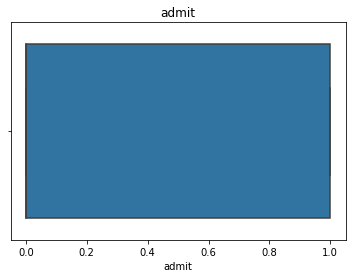

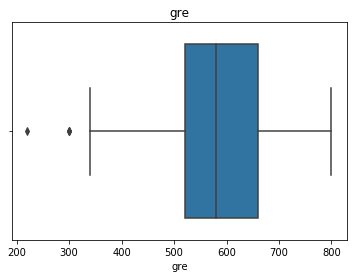

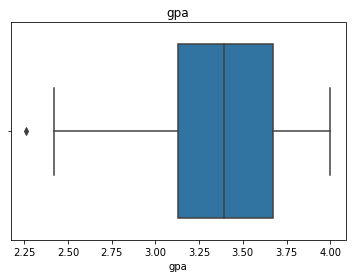

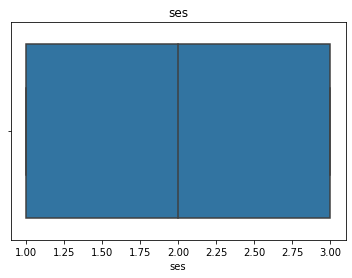

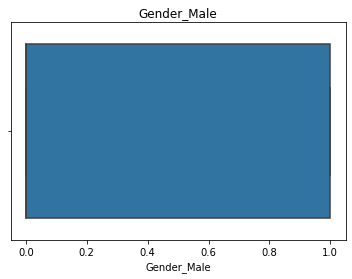

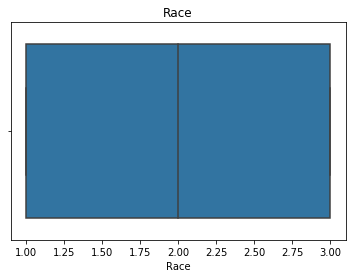

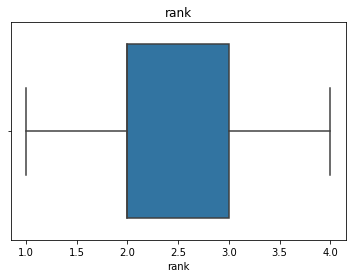

In [83]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [84]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [85]:
Lowgre,Upgre = outlinefree(data.gre)
Lowgpa,Upgpa = outlinefree(data.gpa)

In [86]:
data.gre.replace(list(data[(data.gre < Lowgre)].gre),Lowgre , inplace=True)
data.gre.replace(list(data[(data.gre > Upgre)].gre),Upgre , inplace=True)

data.gpa.replace(list(data[(data.gpa < Lowgpa)].gpa),Lowgpa , inplace=True)
data.gpa.replace(list(data[(data.gpa > Upgpa)].gpa),Upgpa , inplace=True)

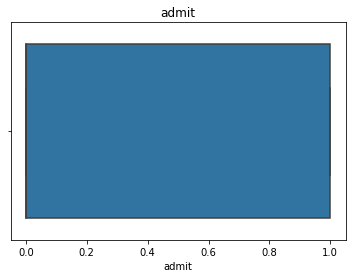

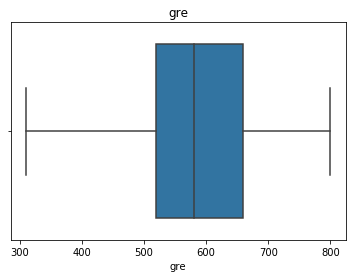

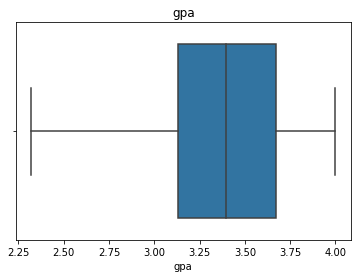

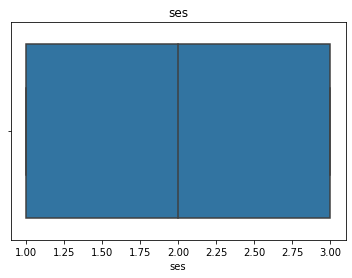

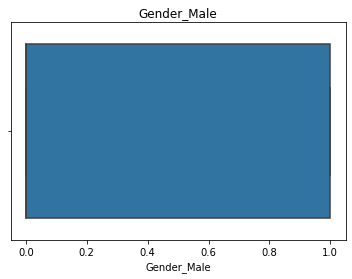

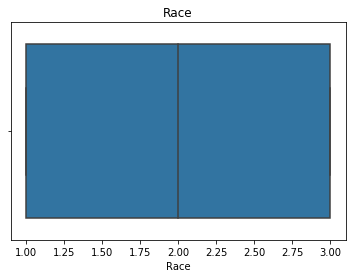

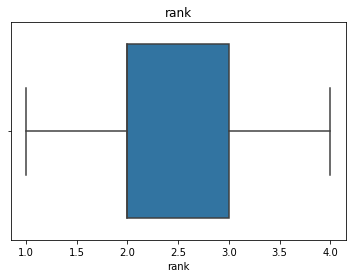

In [87]:

data_num = data[['admit','gre','gpa','ses','Gender_Male','Race','rank']]

for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [88]:
# Find the structure of the data set and if required, transform the numeric data type to factor and vice-versa.

In [89]:

data['rank'].replace([1,2,3,4],['highest','medium','low','lowest'], inplace = True)
data['rank'].value_counts()


data['ses'].replace([1,2,3],['low','medium','high'], inplace = True)
data['ses'].value_counts()


data['Race'].replace([1,2,3],['Hispanic','Asian','African-American'], inplace = True)
data['Race'].value_counts()

Hispanic            143
Asian               129
African-American    128
Name: Race, dtype: int64

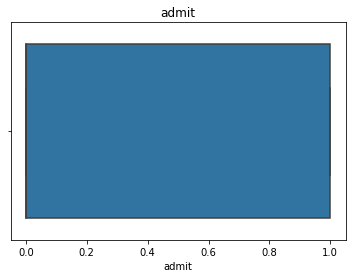

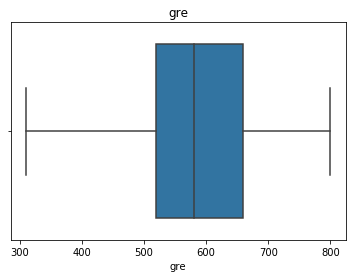

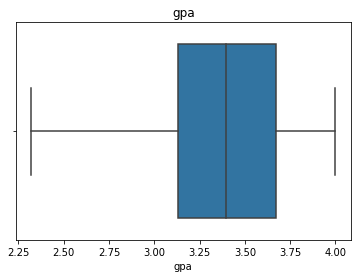

In [90]:
# Find whether the data is normally distributed or not. Use the plot to determine the same. 

data_num = data[['admit','gre','gpa']]

for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [91]:
# Use variable reduction techniques to identify significant variables.

In [92]:

ct = pd.crosstab(data['rank'],data['admit'])

from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. rank and Admit have Relationship")
else:
    print("Null hypothesis passed. rank and Admit doesnot have  Relationship")

Alternate Hypothesis passed. rank and Admit have Relationship


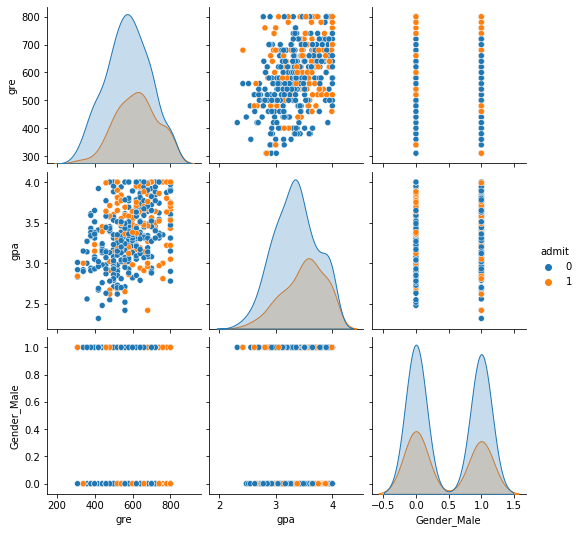

In [93]:
sns.pairplot(data, hue="admit")

In [94]:
# Run logistic model to determine the factors that influence the admission process of a student 
#   (Drop insignificant variables) 

data.drop(['ses', 'Gender_Male','Race','rank'], axis = 1,inplace = True)


In [95]:
data.head()

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93


In [96]:
#Calculate the accuracy of the model and run validation techniques.
features = data.iloc[:,1:].values
label = data.iloc[:,0].values

In [99]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=61)

classimodel= LogisticRegression()  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  
    
y_pred =  classimodel.predict(X_test)
print("test score: {} train score: {} ".format(testscore,trainscore),'\n')        
print(confusion_matrix(y_test, y_pred))
            

test score: 0.7 train score: 0.66  

[[63 10]
 [20  7]]


In [100]:
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 f1 score:  0.3181818181818182 

 precision score:  0.4117647058823529 

 recall score:  0.25925925925925924 

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        73
           1       0.41      0.26      0.32        27

    accuracy                           0.70       100
   macro avg       0.59      0.56      0.56       100
weighted avg       0.67      0.70      0.68       100



In [134]:
# Try other modelling techniques like decision tree and SVM and select a champion model 
# Determine the accuracy rates for each kind of model
# Identify other Machine learning or statistical techniques
 

In [103]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=61) 

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')
y_predNB =  NBmodel.predict(X_test)
print(confusion_matrix(y_test, y_predNB))

test score: 0.65 train score: 0.64 

[[54 19]
 [16 11]]


In [104]:
print("f1_score: ",f1_score(y_test, y_predNB),'\n')
print("precision_score: ",precision_score(y_test, y_predNB),'\n')
print("recall_score: ",recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

f1_score:  0.38596491228070173 

precision_score:  0.36666666666666664 

recall_score:  0.4074074074074074 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        73
           1       0.37      0.41      0.39        27

    accuracy                           0.65       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.66      0.65      0.66       100



In [112]:
#-------------------------------- support vector classification -------------------------------------  
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=18) 

svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predsvc =  svcmodel.predict(X_test)

print(confusion_matrix(y_test, y_predsvc))

test score: 0.72 train score: 0.67 

[[72  0]
 [28  0]]


In [113]:
print("f1_score: ",f1_score(y_test, y_predsvc),'\n')
print("precision_score: ",precision_score(y_test, y_predsvc),'\n')
print("recall_score: ",recall_score(y_test, y_predsvc),'\n')
print(classification_report(y_test, y_predsvc),'\n')

f1_score:  0.0 

precision_score:  0.0 

recall_score:  0.0 

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        72
           1       0.00      0.00      0.00        28

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100
 



In [118]:
#------------------------------------------ DecisionTree---------------------

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=38)
    
modelDtree = DecisionTreeClassifier(max_depth=3)
modelDtree.fit(X_train,y_train)
    
training = modelDtree.score(X_train,y_train)
testing = modelDtree.score(X_test,y_test)    
   
print("testing score: {} , train score: {} ".format(testing,training))

y_predtree =  modelDtree.predict(X_test)

print(confusion_matrix(y_test, y_predtree))

testing score: 0.71 , train score: 0.7 
[[64  6]
 [23  7]]


In [119]:
print("f1_score: ",f1_score(y_test, y_predtree),'\n')
print("precision_score: ",precision_score(y_test, y_predtree),'\n')
print("recall_score: ",recall_score(y_test, y_predtree),'\n')
print(classification_report(y_test, y_predtree),'\n')

f1_score:  0.32558139534883723 

precision_score:  0.5384615384615384 

recall_score:  0.23333333333333334 

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        70
           1       0.54      0.23      0.33        30

    accuracy                           0.71       100
   macro avg       0.64      0.57      0.57       100
weighted avg       0.68      0.71      0.67       100
 



In [126]:
#------------------------------------------------RandomForest-------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=134)
    
modelRFC = RandomForestClassifier(criterion='entropy',max_depth=3)
modelRFC.fit(X_train,y_train)
    
training = modelRFC.score(X_train,y_train)
testing = modelRFC.score(X_test,y_test)   
   
print("testing score: {} , train score: {} ".format(testing,training))

y_predRFC =  modelRFC.predict(X_test)

print(confusion_matrix(y_test, y_predRFC))

testing score: 0.71 , train score: 0.7333333333333333 
[[67  7]
 [22  4]]


In [127]:
print("f1_score: ",f1_score(y_test, y_predRFC),'\n')
print("precision_score: ",precision_score(y_test, y_predRFC),'\n')
print("recall_score: ",recall_score(y_test, y_predRFC),'\n')
print(classification_report(y_test, y_predRFC),'\n')

f1_score:  0.21621621621621623 

precision_score:  0.36363636363636365 

recall_score:  0.15384615384615385 

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        74
           1       0.36      0.15      0.22        26

    accuracy                           0.71       100
   macro avg       0.56      0.53      0.52       100
weighted avg       0.65      0.71      0.66       100
 



0.7378356551584898


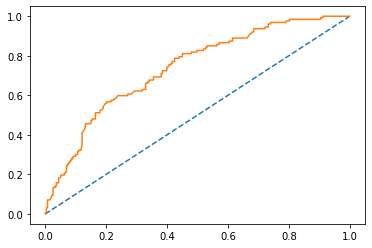

In [128]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.6314931787372732


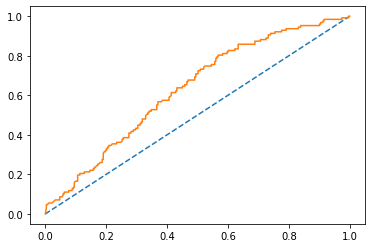

In [129]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.5542528337803928


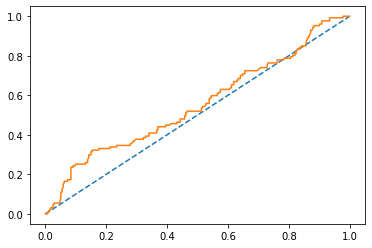

In [130]:
#--------------------------------------  support vector classification -------------------------------------
probabilityValues = svcmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.6880678376741368


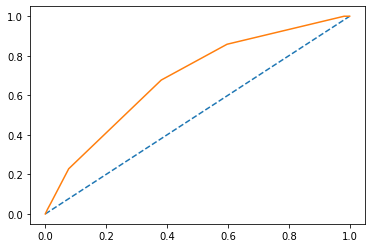

In [131]:
#-------------------------------------- DecisionTree -------------------------------------

probabilityValues = modelDtree.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.7281301375789564


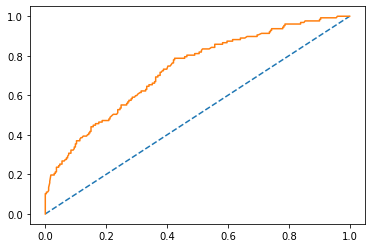

In [132]:
#-------------------------------------- RandomForest -------------------------------------
probabilityValues = modelRFC.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

# Select the most accurate model

**RandomForestClassifier score**

1. **f1_score:  0.21621621621621623 ** 
2. **auc: 0.7281301375789564**
